# Method 1: Pre-processing and Train Model
### Pre-processing

In [1]:
import pandas as pd
import numpy as np

In [2]:
reviews_sample = pd.read_csv('reviews10000.csv')

In [3]:
reviews_sample.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,4694397,Llol4TRuLoVmCsbVSnuIDA,75JyTel9uUs7VNFhTmK56w,sPwgafejYVdf8hd4-oDYVg,1.0,2015-08-30 17:32:01,Awful. The lemon pepper wing sauce is black fo...,0,0,0
1,3142277,moHHEwAINiwsjohq6doYrQ,lhDgwKq2Gh8TIIyexubRag,9U4Tqt5SkZKQ6eeH6IPSxQ,5.0,2018-04-11 04:36:23,We had an awesome experience at hibachi. Our c...,0,0,1
2,2342009,6TF21--YL6ig6r0Oae1qGA,jpib9MAMB_aVxyCDUi9VAg,yFUvKpW66cNsYXD6inDsog,5.0,2015-01-27 03:54:16,I truly enjoy this neighborhood spot. Good foo...,0,0,0
3,3547267,MN2PqoIWECNmI3fuqdZyEA,bFF1HZzb8k3gimLHU52bQA,WnOVGJTu7RK0iWurrgiBNA,5.0,2018-06-28 19:06:47,Best tanning place around in NC\r\r\nHope and ...,0,0,0
4,4449537,MG4o8ke2G6VYXDy1HUCbIg,PT3whiZ1mW3psCz_lcp7ww,6BO1PcdtU6idqO0njUnCYA,1.0,2016-07-12 16:49:09,Staff is horrible. Last time I ordered from he...,0,0,1


In [4]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tuf87933.TU\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tuf87933.TU\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

***Preprocessing***
1. Remove punctuation
2. Remove stop words

***STOP WORDS***

{‘ourselves’, ‘hers’, ‘between’, ‘yourself’, ‘but’, ‘again’, ‘there’, ‘about’, ‘once’, ‘during’, ‘out’, ‘very’, ‘having’, ‘with’, ‘they’, ‘own’, ‘an’, ‘be’, ‘some’, ‘for’, ‘do’, ‘its’, ‘yours’, ‘such’, ‘into’, ‘of’, ‘most’, ‘itself’, ‘other’, ‘off’, ‘is’, ‘s’, ‘am’, ‘or’, ‘who’, ‘as’, ‘from’, ‘him’, ‘each’, ‘the’, ‘themselves’, ‘until’, ‘below’, ‘are’, ‘we’, ‘these’, ‘your’, ‘his’, ‘through’, ‘don’, ‘nor’, ‘me’, ‘were’, ‘her’, ‘more’, ‘himself’, ‘this’, ‘down’, ‘should’, ‘our’, ‘their’, ‘while’, ‘above’, ‘both’, ‘up’, ‘to’, ‘ours’, ‘had’, ‘she’, ‘all’, ‘no’, ‘when’, ‘at’, ‘any’, ‘before’, ‘them’, ‘same’, ‘and’, ‘been’, ‘have’, ‘in’, ‘will’, ‘on’, ‘does’, ‘yourselves’, ‘then’, ‘that’, ‘because’, ‘what’, ‘over’, ‘why’, ‘so’, ‘can’, ‘did’, ‘not’, ‘now’, ‘under’, ‘he’, ‘you’, ‘herself’, ‘has’, ‘just’, ‘where’, ‘too’, ‘only’, ‘myself’, ‘which’, ‘those’, ‘i’, ‘after’, ‘few’, ‘whom’, ‘t’, ‘being’, ‘if’, ‘theirs’, ‘my’, ‘against’, ‘a’, ‘by’, ‘doing’, ‘it’, ‘how’, ‘further’, ‘was’, ‘here’, ‘than’}

<img src="negation alg.png">

In [7]:
# function to remove all punctuation except underscores and stop words

import string 
import re

def remove_punc_stop(text):
    
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    nopunc = re.sub(pattern, "", text)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [8]:
sample_text = "As a Temple student, I love this place! The food is fantastic! They have gourmet style pizzas that are New York style and fantastic. The bar isn't too expensive, and is always a fun time!"

sample_text = remove_punc_stop(sample_text)
print(sample_text)

['Temple', 'student', 'love', 'place', 'food', 'fantastic', 'gourmet', 'style', 'pizzas', 'New', 'York', 'style', 'fantastic', 'bar', 'isnt', 'expensive', 'always', 'fun', 'time']


In [9]:
#function to combine all preprocessing 
def text_process(text):
    text = remove_punc_stop(text)
    return text

In [10]:
sample_text = "As a Temple student, I love this place! The food is fantastic! They have gourmet style pizzas that are New York style and fantastic. The bar isn't too expensive, and is always a fun time!"

preprocessed = text_process(sample_text)
print(preprocessed)


['Temple', 'student', 'love', 'place', 'food', 'fantastic', 'gourmet', 'style', 'pizzas', 'New', 'York', 'style', 'fantastic', 'bar', 'isnt', 'expensive', 'always', 'fun', 'time']


In [11]:
# get just the text from the collection of reviews
review_text = reviews_sample['text']
review_stars = reviews_sample['stars']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
# process text using text_process
# bow_transformer = CountVectorizer(analyzer=text_process).fit(X)
bow_transformer = CountVectorizer(analyzer=text_process).fit(review_text)

In [14]:
# size of the vocabulary stored in the vectorizer
len(bow_transformer.vocabulary_)

39729

In [15]:
# Review 20

# Text
review_20 = review_text[20]
print(review_20)

# Feature Vector
print("\n")
bow_20 = bow_transformer.transform([review_20])
print(bow_20)

# First 3 Words
print("\n")
print(bow_transformer.get_feature_names()[13102])
print(bow_transformer.get_feature_names()[14457])
print(bow_transformer.get_feature_names()[18862])

Thanks guys.. did a great job. My wife is very happy. Yes .. I would tell a friend to come see you.. to thumbs up


  (0, 13107)	1
  (0, 14462)	1
  (0, 18877)	1
  (0, 23497)	1
  (0, 24248)	1
  (0, 24454)	1
  (0, 24640)	1
  (0, 26331)	1
  (0, 33995)	1
  (0, 36738)	1
  (0, 37068)	1
  (0, 39175)	1
  (0, 39400)	1


Thanh
Yelper
comanda


In [16]:
review_50 = review_text[50]
print(review_50)

print("\n")
bow_50 = bow_transformer.transform([review_50])
print(bow_50)

# words that appears 3 times
print("\n")
print(bow_transformer.get_feature_names()[18559])
print(bow_transformer.get_feature_names()[27386])



I would like to update with a few more things that I love about Orange Theory: (1) Class size is limited. Ensures that everyone has enough space. (2) The apps that keep track of your classes and monitor your progress are fab! I love apps. (3) Trainer directed class. It's like having a personal trainer. You just listen and go! (4) Every class is different. (5) Nearly impossible to slack off and not have a great workout.


  (0, 31)	1
  (0, 450)	1
  (0, 659)	1
  (0, 791)	1
  (0, 913)	1
  (0, 3798)	1
  (0, 5126)	1
  (0, 5215)	1
  (0, 6825)	1
  (0, 9315)	1
  (0, 9712)	1
  (0, 12531)	1
  (0, 13116)	1
  (0, 13272)	1
  (0, 13344)	1
  (0, 15553)	1
  (0, 15572)	2
  (0, 18574)	3
  (0, 18576)	1
  (0, 20695)	1
  (0, 20788)	1
  (0, 21881)	1
  (0, 22139)	1
  (0, 22470)	1
  (0, 22606)	1
  :	:
  (0, 27188)	1
  (0, 27401)	3
  (0, 28042)	1
  (0, 28502)	1
  (0, 30534)	1
  (0, 30597)	1
  (0, 31664)	1
  (0, 32267)	1
  (0, 33779)	1
  (0, 34568)	1
  (0, 34670)	1
  (0, 34747)	1
  (0, 35241)	1
  (0, 35533)	1

In [17]:
#X = bow_transformer.transform(X)

transformed_review_text = bow_transformer.transform(review_text)


In [18]:
print('Shape of Sparse Matrix: ', transformed_review_text.shape)
print('Amount of Non-Zero occurrences: ', transformed_review_text.nnz)
# Percentage of non-zero values
density = (100.0 * transformed_review_text.nnz / (transformed_review_text.shape[0] * transformed_review_text.shape[1]))
print('Density: ', density)

Shape of Sparse Matrix:  (10000, 39729)
Amount of Non-Zero occurrences:  495061
Density:  0.1246094792217272


### Train Model
#### Method 1: Remove stop words and punctuation

In [19]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(transformed_review_text, review_stars, test_size=0.3, random_state=101)

In [20]:
from sklearn.naive_bayes import MultinomialNB

# train model
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
# store predictions as a separate dataframe
preds = nb.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# confusion matrix
print("Confusion Matrix\n")
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

Confusion Matrix

[[ 321    7   10   48   55]
 [  72    5    7   84   51]
 [  36    5   10  178   93]
 [  27    7    8  346  342]
 [  54    3    0  180 1051]]


             precision    recall  f1-score   support

        1.0       0.63      0.73      0.68       441
        2.0       0.19      0.02      0.04       219
        3.0       0.29      0.03      0.06       322
        4.0       0.41      0.47      0.44       730
        5.0       0.66      0.82      0.73      1288

avg / total       0.52      0.58      0.53      3000



In [5]:
! pip install mlxtend 

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

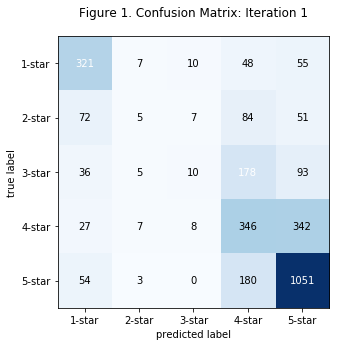

In [13]:
binary = np.array([[321,7,10,48,55],
 [72,5,7,84,51],
 [36,5,10,178,93],
 [27,7,8,346,342],
 [54,3,0,180,1051]])

labels = ['1-star', '2-star', '3-star', '4-star', '5-star']
fig, ax = plot_confusion_matrix(conf_mat=binary, figsize=(5,5))
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.title('Figure 1. Confusion Matrix: Iteration 1')
plt.show()